In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.shape

(1000, 8)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [28]:
# to check missing values
df.isnull().sum()
# no missing values in this dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [29]:
#another way to calculate missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
#to check duplicates
df[df.duplicated()]
#no duplicate data is present in this data 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [31]:
#to check datatypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [33]:
# check uniqueness 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
#to see the statastics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

In [35]:
### Explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# to sagricate the catagorical values and numarical values
numarical_features=[features for features in df.columns if df[features].dtype!='O']
catagorical_features=[features for features in df.columns if df[features].dtype=='O']

In [37]:
numarical_features, catagorical_features

(['math score', 'reading score', 'writing score'],
 ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'])

In [38]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [39]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['avg_total_score']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Explore More Visualization

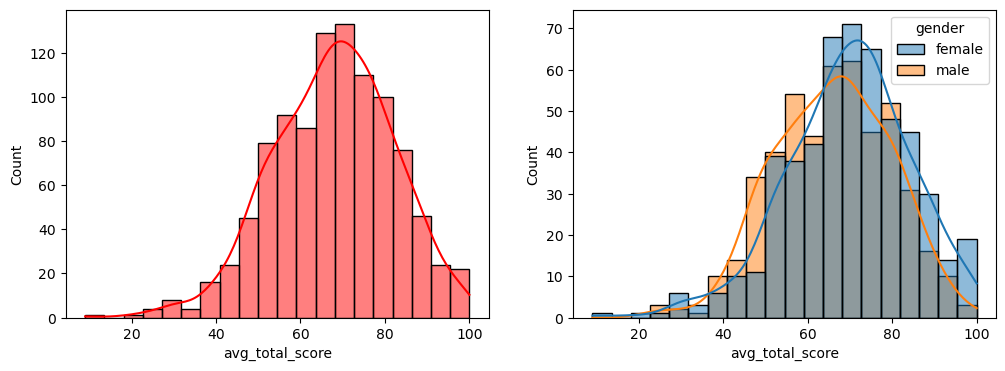

In [51]:
fig,axis=plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
sns.histplot(data=df,x="avg_total_score",bins=20,kde=True,color="r")
plt.subplot(122)
sns.histplot(data=df,x="avg_total_score",bins=20,kde=True,hue="gender",color="r")
plt.show()

## Insights
- Female student tend to perform well than male students

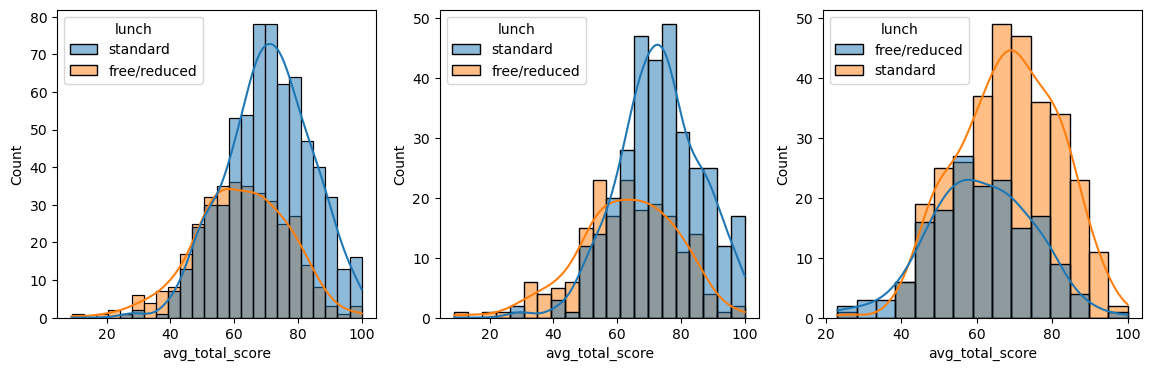

In [50]:
plt.subplots(1,3,figsize=(14,4))
plt.subplot(131)
sns.histplot(data=df,x='avg_total_score',kde="True",hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x="avg_total_score",kde="Ture",hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_total_score',kde="True",hue="lunch")
plt.show()

## Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams whether  it is male or female

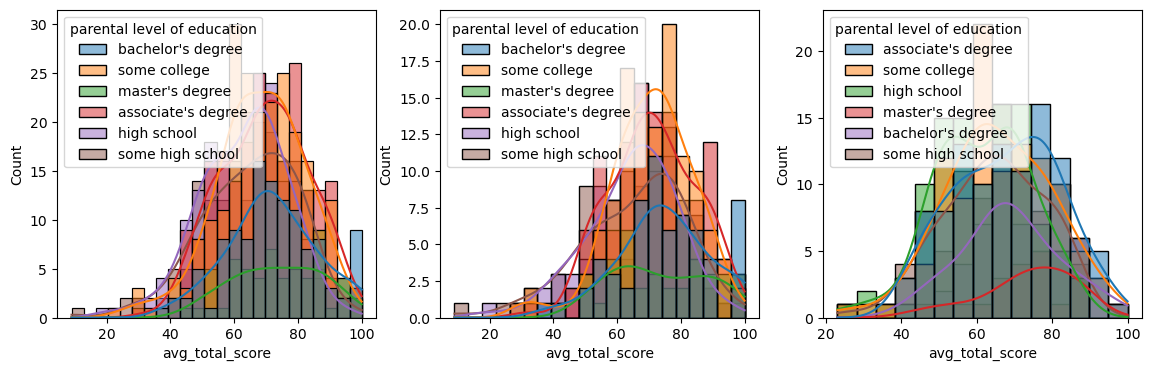

In [49]:
plt.subplots(1,3,figsize=(14,4))
plt.subplot(131)
sns.histplot(data=df,x='avg_total_score',kde="True",hue="parental level of education")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x="avg_total_score",kde="Ture",hue="parental level of education")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_total_score',kde="True",hue="parental level of education")
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

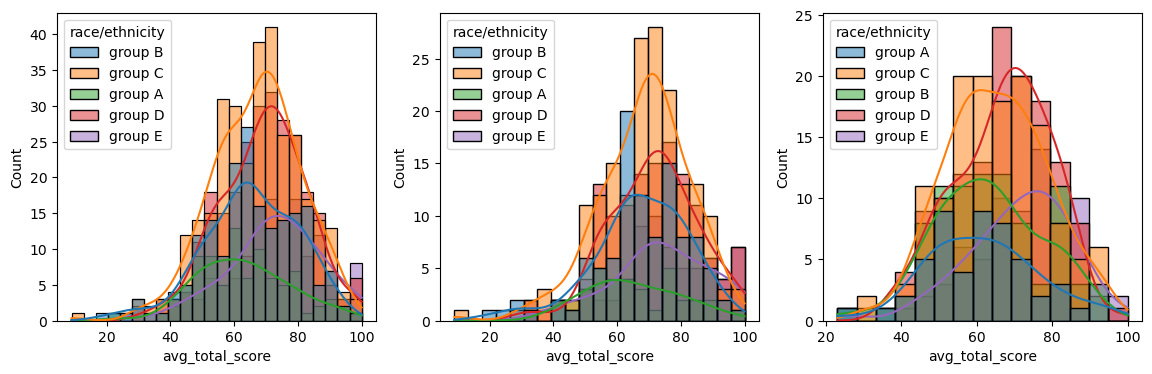

In [47]:
plt.subplots(1,3,figsize=(14,4))
plt.subplot(131)
sns.histplot(data=df,x='avg_total_score',kde="True",hue="race/ethnicity")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x="avg_total_score",kde="Ture",hue="race/ethnicity")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='avg_total_score',kde="True",hue="race/ethnicity")
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female